In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("mtcars.csv")

In [3]:
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.tail(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [5]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [6]:
df = df.drop(['disp', 'drat', 'wt'], axis=1)
df.head(5)

,model,mpg,cyl,hp,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,110,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,110,17.02,0,1,4,4
2,Datsun 710,22.8,4,93,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,110,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,175,17.02,0,0,3,2


In [7]:
df = df.rename(columns={"mpg": "Miles Per Gallon", "cyl": "cylinder", "hp": "horsepower", "carb": "carburetor" })
df.head(5)

,model,Miles Per Gallon,cylinder,horsepower,qsec,vs,am,gear,carburetor
0,Mazda RX4,21.0,6,110,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,110,17.02,0,1,4,4
2,Datsun 710,22.8,4,93,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,110,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,175,17.02,0,0,3,2


In [8]:
df.shape

(32, 9)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [10]:
df.count()

model               32
Miles Per Gallon    32
cylinder            32
horsepower          32
qsec                32
vs                  32
am                  32
gear                32
carburetor          32
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,model,Miles Per Gallon,cylinder,horsepower,qsec,vs,am,gear,carburetor
0,Mazda RX4,21.0,6,110,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,110,17.02,0,1,4,4
2,Datsun 710,22.8,4,93,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,110,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,175,17.02,0,0,3,2


In [12]:
df.count()

model               32
Miles Per Gallon    32
cylinder            32
horsepower          32
qsec                32
vs                  32
am                  32
gear                32
carburetor          32
dtype: int64

In [13]:
print(df.isnull().sum())

model               0
Miles Per Gallon    0
cylinder            0
horsepower          0
qsec                0
vs                  0
am                  0
gear                0
carburetor          0
dtype: int64


In [14]:
df = df.dropna()
df.count()

model               32
Miles Per Gallon    32
cylinder            32
horsepower          32
qsec                32
vs                  32
am                  32
gear                32
carburetor          32
dtype: int64

In [15]:
print(df.isnull().sum()) 

model               0
Miles Per Gallon    0
cylinder            0
horsepower          0
qsec                0
vs                  0
am                  0
gear                0
carburetor          0
dtype: int64


<AxesSubplot:xlabel='qsec'>

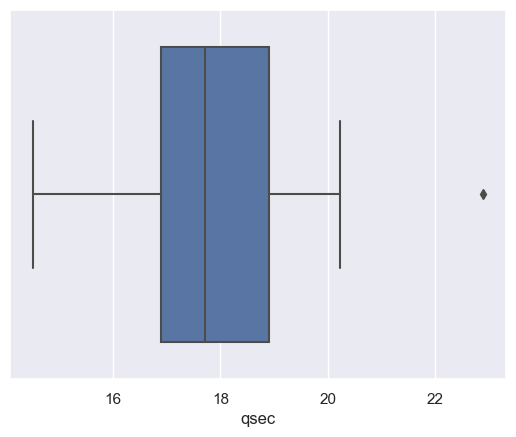

In [16]:
sns.boxplot(x=df['qsec'])

<AxesSubplot:xlabel='horsepower'>

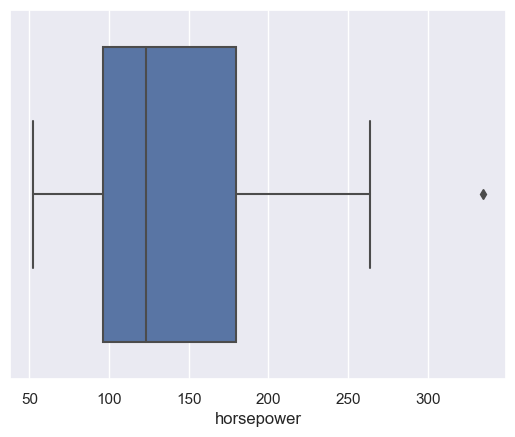

In [19]:
sns.boxplot(x=df['horsepower'])

<AxesSubplot:xlabel='cylinder'>

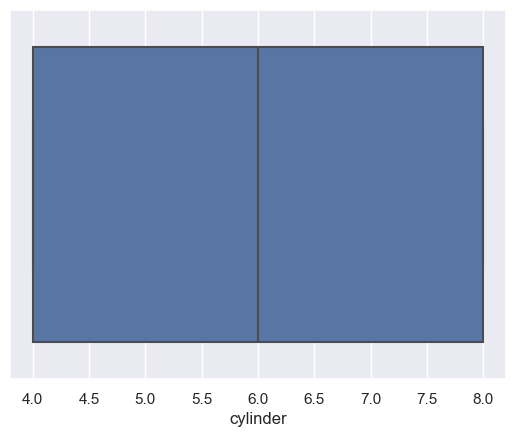

In [20]:
sns.boxplot(x=df['cylinder'])

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Miles Per Gallon     7.3750
cylinder             4.0000
horsepower          83.5000
qsec                 2.0075
vs                   1.0000
am                   1.0000
gear                 1.0000
carburetor           2.0000
dtype: float64


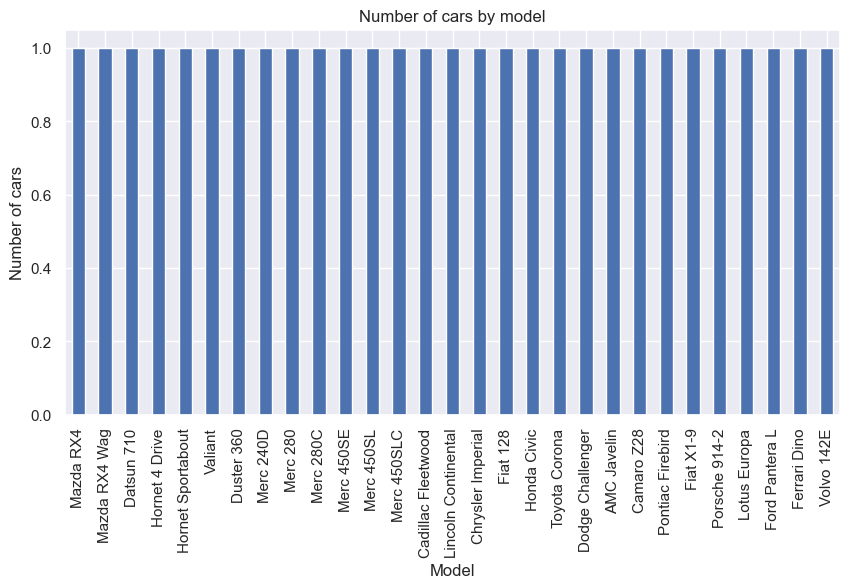

In [35]:
df.model.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by model")
plt.ylabel('Number of cars')
plt.xlabel('Model');

,Miles Per Gallon,cylinder,horsepower,qsec,vs,am,gear,carburetor
Miles Per Gallon,1.000000,-0.857554,-0.813396,0.348772,0.638568,0.658346,0.580437,-0.537477
cylinder,-0.857554,1.000000,0.860819,-0.519757,-0.786046,-0.621196,-0.587820,0.492763
horsepower,-0.813396,0.860819,1.000000,-0.683962,-0.734462,-0.414295,-0.332292,0.625898
qsec,0.348772,-0.519757,-0.683962,1.000000,0.755162,-0.185337,-0.235073,-0.638709
vs,0.638568,-0.786046,-0.734462,0.755162,1.000000,0.208979,0.249852,-0.571167
am,0.658346,-0.621196,-0.414295,-0.185337,0.208979,1.000000,0.812235,-0.052365
gear,0.580437,-0.587820,-0.332292,-0.235073,0.249852,0.812235,1.000000,0.145942
carburetor,-0.537477,0.492763,0.625898,-0.638709,-0.571167,-0.052365,0.145942,1.000000


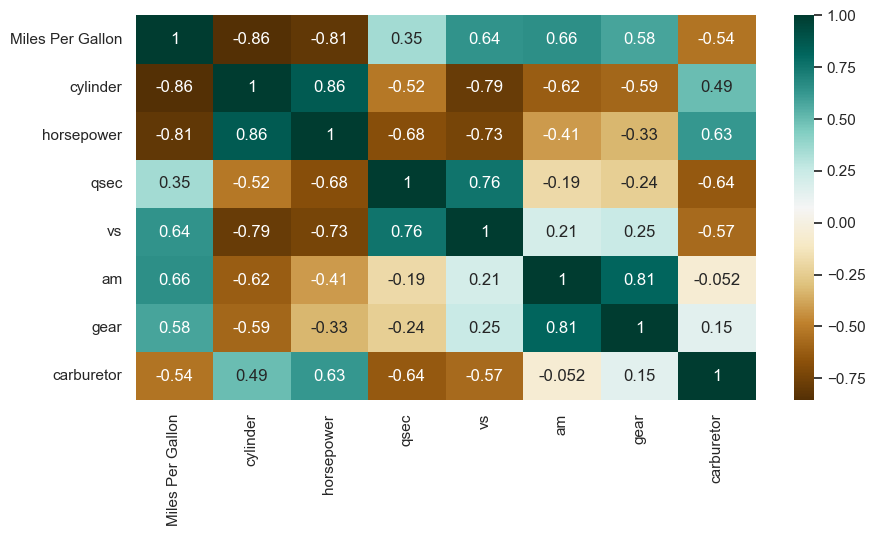

In [36]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

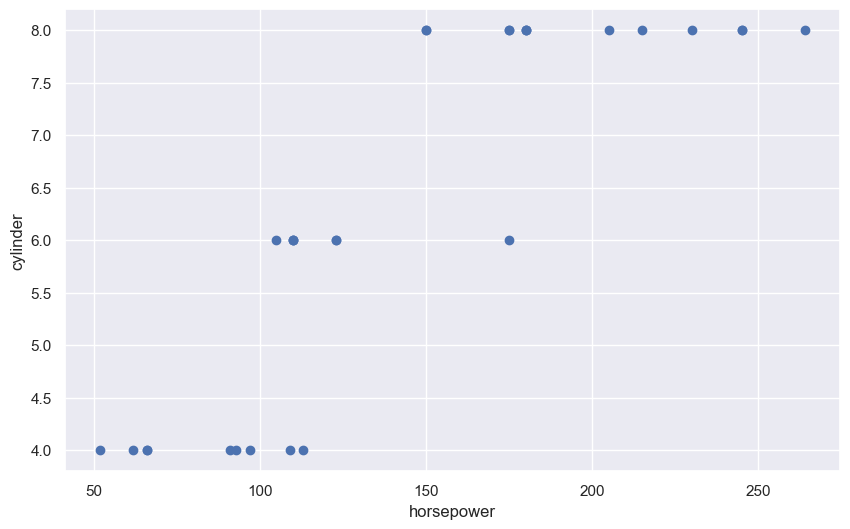

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['horsepower'], df['cylinder'])
ax.set_xlabel('horsepower')
ax.set_ylabel('cylinder')
plt.show()